# Task 4.9 Part 2

This script contains the following points:

    01. Improting Libraries
    02. Importing CSV/PKL files
    03. Work for Task Part 2
    04. Exporting visualizations    

## 01. Importing Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing CSV/PKL files

In [2]:
# Identifying pathway for import for ease with multiple imports
path = r'C:\Users\Chris Arnold\Documents\Instacart Basket Analysis'

In [4]:
# Importing customers.csv
entire_set = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

## 03. Work for task Part 2

### If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

Bar Chart

<AxesSubplot:>

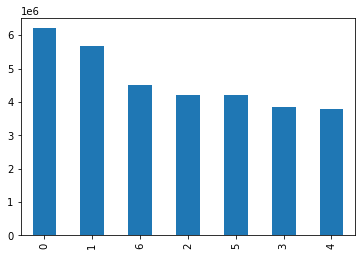

In [5]:
#plotting bar chart of orders day of the week
entire_set['order_dow'].value_counts().plot.bar()

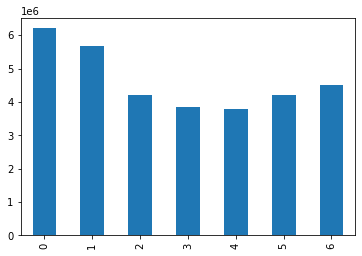

In [8]:
# using sort index on the same command
bar = entire_set['order_dow'].value_counts().sort_index().plot.bar()

Histogram

<AxesSubplot:ylabel='Frequency'>

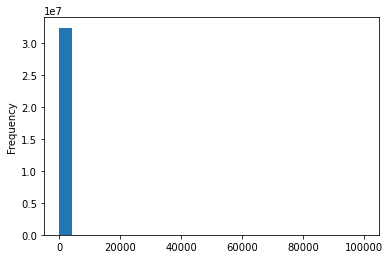

In [9]:
# Creating a histogram of the prices column
entire_set['prices'].plot.hist(bins = 25)

##Found issue must fix##

In [10]:
# describing the column prices
entire_set['prices'].describe()

count    3.240604e+07
mean     1.198004e+01
std      4.956464e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

Looking at a scatter plot to explore further

<AxesSubplot:xlabel='prices', ylabel='prices'>

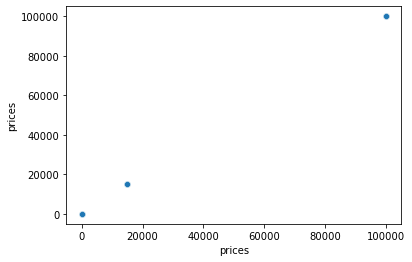

In [11]:
sns.scatterplot(x = 'prices', y = 'prices',data = entire_set)

In [13]:
# Diving a little deeper with the loc function to find prices over 1
entire_set.loc[entire_set['prices'] > 100]

,User_ID,First_Name,Last_Name,Gender,State,Age,Date_Joined,Number_of_Dependants,Family_Status,Income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,Total_spent,Mean_prices,Spender_type,Median_days_since_prior_order,Customer_frequency
5547,117740,Lisa,Sparks,Female,Oregon,55,1/1/2017,1,married,292759,...,Regularly busy,Regularly busy,Most Orders,84,Loyal customer,14900.0,36.928431,High_spender,4.0,Frequent_customer
10303,31590,Beverly,Sanford,Female,Montana,46,1/1/2017,0,single,154076,...,Regularly busy,Regularly busy,Average Orders,38,Regular customer,14900.0,58.139865,High_spender,8.0,Frequent_customer
27945,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,Regularly busy,Regularly busy,Most Orders,5,New customer,14900.0,627.991667,High_spender,11.0,Regular_customer
27946,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,Busiest day,Busiest days,Most Orders,5,New customer,14900.0,627.991667,High_spender,11.0,Regular_customer
27947,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,Busiest day,Busiest days,Average Orders,5,New customer,14900.0,627.991667,High_spender,11.0,Regular_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32392104,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,Regularly busy,Slowest days,Most Orders,53,Loyal customer,14900.0,69.638604,High_spender,7.0,Frequent_customer
32392105,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,Regularly busy,Regularly busy,Average Orders,53,Loyal customer,14900.0,69.638604,High_spender,7.0,Frequent_customer
32392106,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,Regularly busy,Regularly busy,Average Orders,53,Loyal customer,14900.0,69.638604,High_spender,7.0,Frequent_customer
32398172,140589,Clarence,Harper,Male,Maryland,26,4/1/2020,0,single,154845,...,Regularly busy,Regularly busy,Most Orders,9,New customer,99999.0,876.974783,High_spender,20.0,Regular_customer


In [15]:
# Marking the above prices as missing
entire_set.loc[entire_set['prices'] >100, 'prices'] = np.nan

In [17]:
#Checking the new max value of prices
entire_set['prices'].max()

25.0

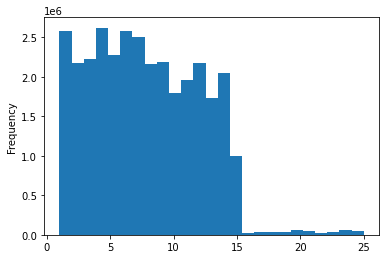

In [18]:
#Now that this has been fixed, lets see the histogram again
hist = entire_set['prices'].plot.hist(bins = 25)

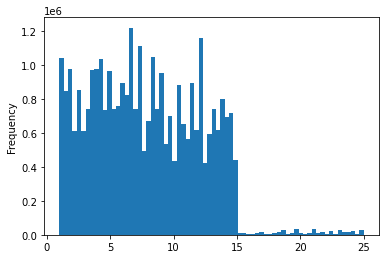

In [19]:
# increasing granularity
hist = entire_set['prices'].plot.hist(bins = 70)

Line Chart

In [20]:
# Splitting 70/30
np.random.seed(4)
dev = np.random.rand(len(entire_set)) <= 0.7

In [21]:
# Store 70% of the sample in the datafram big
big = entire_set[dev]

In [22]:
#store 30% of the sample in the dataframe small
small = entire_set[~dev]

In [23]:
# Checking over what was done
len(entire_set)

32406041

In [24]:
# Checking what was done
len(big) + len(small)

32406041

In [25]:
# Getting only the information we want for this 
df_2 = small[['order_dow','prices']]

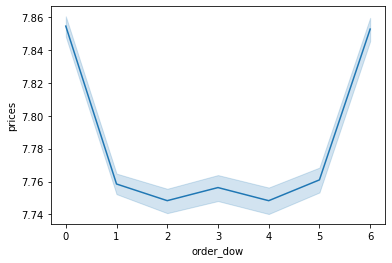

In [26]:
# creating chart
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

    In a markdown cell beneath your histogram, describe what the histogram demonstrates.


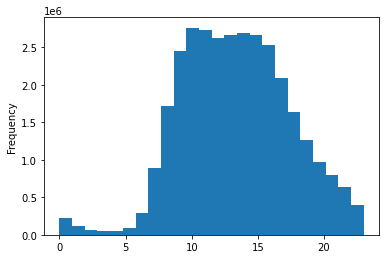

In [39]:
# Creating a histogram of the prices column with 24 bins, since there are 24 hours in a day
HOD_Hist = entire_set['order_hour_of_day'].plot.hist(bins = 24)

From what we can see here, people tend to not order in the overnight hours as much (from midnight to 6am). The orders pick up at 7am and peak at 10 am through 4pm, then slowly die off as the day gets later.

### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

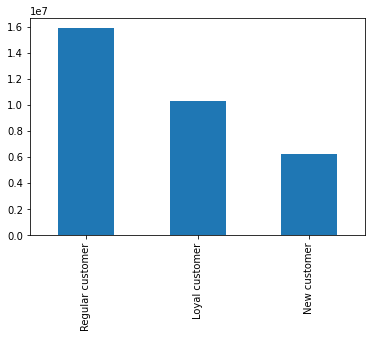

In [40]:
#plotting bar chart of loyalty_flag
Loyalty_BAR = entire_set['loyalty_flag'].value_counts().plot.bar()

Most customers are "Regular customers", followed by "Loyal customers", and the least amount of customers are labeled as "New customers."

### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

I will borrow the sample created for the line chart created earlier

In [33]:
# Getting only the information we want for this 
df_3 = small[['order_hour_of_day','prices']]

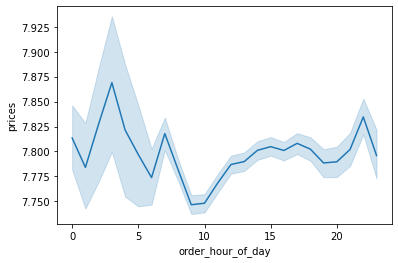

In [34]:
# creating chart
line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

It is interesting to see that the overnight hours tend to bring out the higher spenders along with the daybreak hours.

### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

    In a markdown cell beneath your line chart, describe what the line chart shows.


In [35]:
# Getting only the information we want for this 
df_4 = small[['Age','Number_of_Dependants']]

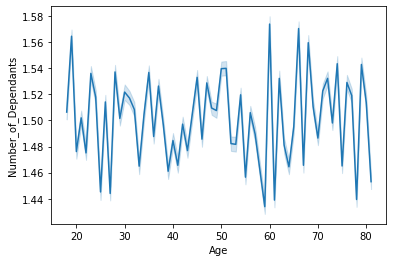

In [36]:
# creating chart
line3 = sns.lineplot(data = df_4, x = 'Age', y = 'Number_of_Dependants')

This is a little different than I would have expected. There are some peaks that can give some insights though. There are some customers that have dependants across all age brackets. The peaks seem to be in under 20 years old, mid 20s, late 20s/early 30s,  45-50, and some spikes between 60-70 showing the highest numbers after the 20s. The numbers through the 50s I would assume are probably nuclear families that are raising their kids. The spikes in the 60's+ are most likely multi-generational households.

### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

    In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


In [37]:
# Getting only the information we want for this 
df_5 = small[['Age','Income']]

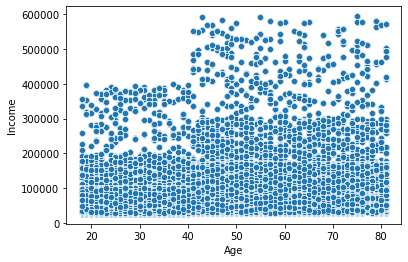

In [41]:
Age_VS_Income = sns.scatterplot(x = 'Age', y = 'Income',data = df_5)

There is a deninite correlation between age and income. In general the older groups earn more as they age higher, with a major jump in the early 40s.

## 04. Exporting Visualizations

In [42]:
# Saving 'HOD_Hist' created above 
HOD_Hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Hour_of_Day_Histogram.png'))

In [43]:
# Saving 'Loyalty_BAR' created above 
Loyalty_BAR.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Loyalty_Bar_chart.png'))

In [44]:
# Saving 'order hour of day vs prices' created above 
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hod_vs_prices.png'))

In [45]:
# Saving 'age vs number of dependants' created above 
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_num_of_dep.png'))

In [46]:
# Saving 'age vs number of dependants' created above 
Age_VS_Income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_income.png'))